In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')


In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
df.duplicated('CustomerId').sum()


0

In [6]:
df=df.set_index('CustomerId') 


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [8]:
df['Geography'].value_counts()



France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df.replace({'Geography': {'France': 2,'Germany':1, 'Spain' :0}}, inplace=True)

In [10]:
df['Geography'].value_counts()



2    5014
1    2509
0    2477
Name: Geography, dtype: int64

In [11]:
df['Gender']. value_counts()



Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
df.replace({'Gender': {'Male': 0, 'Female':1}}, inplace=True)

In [13]:
df['Gender']. value_counts()



0    5457
1    4543
Name: Gender, dtype: int64

In [14]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [15]:
df.replace({'Num Of Products': {1: 0, 2:1, 3:1, 4:1 }}, inplace=True)

In [16]:
df['Num Of Products'].value_counts()

0    5084
1    4916
Name: Num Of Products, dtype: int64

In [17]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [18]:

df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [19]:

df.loc[(df['Balance']==0),'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

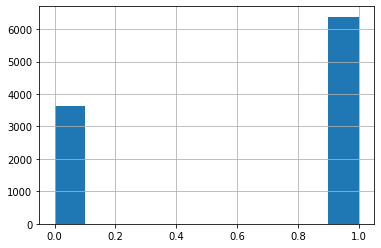

In [20]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)
df['Zero Balance'].hist()

In [21]:
df.groupby(['Churn','Geography']).count()


Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [22]:
df.columns


Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [23]:

X=df.drop(['Surname','Churn'],axis=1)

In [24]:
y=df['Churn']

In [25]:
X.shape,y.shape

((10000, 11), (10000,))

In [26]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

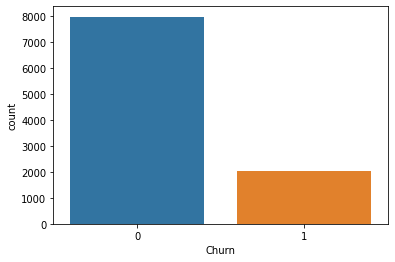

In [27]:
sns.countplot(x='Churn',data=df);

In [28]:
from imblearn.under_sampling import RandomUnderSampler


In [32]:
rus=RandomUnderSampler(random_state=182529)

In [33]:
X_rus,y_rus=rus.fit_resample(X,y)


In [34]:
X_rus.shape,y_rus.shape,X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [35]:

y.value_counts()


0    7963
1    2037
Name: Churn, dtype: int64

In [36]:

y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

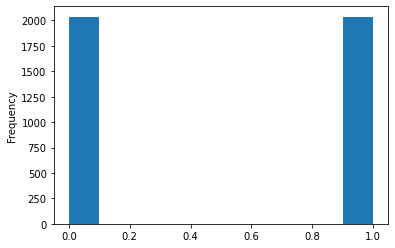

In [37]:

y_rus.plot(kind='hist') 

In [38]:
#random over sampling
from imblearn.over_sampling import RandomOverSampler

In [44]:
ros=RandomOverSampler(random_state=182529)

In [45]:
X_ros,y_ros=ros.fit_resample(X,y)

In [46]:
X_ros.shape,y_ros.shape,X.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [47]:

y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=12529)

In [50]:
X_train_rus, X_test_rus, y_train_rus,y_test_rus=train_test_split(X_rus,y_rus, test_size=0.3,random_state=12529)

In [51]:
X_train_ros, X_test_ros, y_train_ros,y_test_ros=train_test_split(X_rus,y_rus, test_size=0.3,random_state=12529)

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [53]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [54]:
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [55]:
X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [56]:
X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [57]:
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [58]:
X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [59]:
from sklearn.svm import SVC

In [60]:
svc=SVC()

In [61]:
svc.fit(X_train, y_train)

SVC()

In [62]:

y_pred=svc.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
confusion_matrix(y_test, y_pred)

array([[2321,   31],
       [ 491,  157]])

In [65]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2352
           1       0.84      0.24      0.38       648

    accuracy                           0.83      3000
   macro avg       0.83      0.61      0.64      3000
weighted avg       0.83      0.83      0.79      3000



In [66]:
svc_rus=SVC()

In [67]:
svc_rus.fit(X_train_rus, y_train_rus)

SVC()

In [68]:

y_pred_rus=svc_rus.predict(X_test_rus)

In [69]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[446, 153],
       [190, 434]])

In [70]:

print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       599
           1       0.74      0.70      0.72       624

    accuracy                           0.72      1223
   macro avg       0.72      0.72      0.72      1223
weighted avg       0.72      0.72      0.72      1223



In [71]:
svc_ros=SVC()

In [72]:
svc_ros.fit(X_train_ros, y_train_ros)

SVC()

In [73]:

y_pred_ros=svc_ros.predict(X_test_ros)

In [74]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[446, 153],
       [190, 434]])

In [75]:

print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       599
           1       0.74      0.70      0.72       624

    accuracy                           0.72      1223
   macro avg       0.72      0.72      0.72      1223
weighted avg       0.72      0.72      0.72      1223

